In [140]:
%pylab inline
from astropy import units
from astropy import constants
from cosmotools import rvir, rvir2
from profiles import *
import os.path

Populating the interactive namespace from numpy and matplotlib


In [213]:
font = {'size':13, 'family':'serif'}
matplotlib.rc('font', **font)


In [165]:
# Constants
h = 0.7
H = 67.8 * units.km / units.s / units.Mpc
print G, H

4.51835939627e-39 kpc3 / (s2 solMass) 67.8 km / (Mpc s)


# MW model 

In [228]:
IC_chervin = loadtxt('../ICs/MW_models/MW1/chevin_rotcurve.txt', skiprows=1)
IC_hack = loadtxt('../ICs/MW_models/MW1/MW1_rotcurve.txt', skiprows=1)
IC_MW = loadtxt('../ICs/MW_models/MW1/rotcurve.txt', skiprows=1)

In [233]:
vc_chervin_halo = IC_chervin[:,2]
vc_chervin_MW = IC_chervin[:,1]
vc_MW = IC_MW[:,1]
vc_MW_halo = IC_MW[:,2]
vc_MW_r = IC_MW[:,0] / h

r = IC_chervin[:,0] / h
vc_hack_halo = IC_hack[:,1]
r2 = IC_hack[:,0] / h 

In [255]:
r20 = linspace(0, 20, 100)
vc_teo = vc_hernquist(53.06, r20, 0, 0, 1.38E12)
vc_teo2 = vc_hernquist(40.15, r20, 0, 0, 1.385E12)

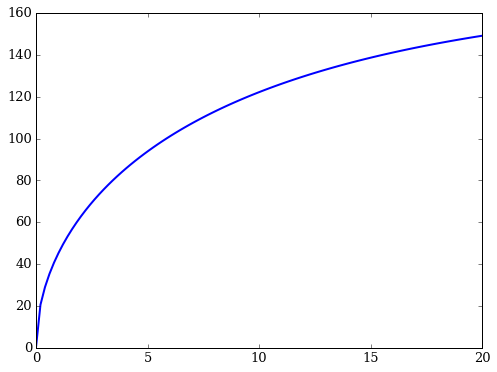

In [256]:
figure(figsize=(8, 6))
#plot(r, vc_chervin_halo, lw=2)
#plot(r, vc_chervin_MW, lw=2)
#plot(r2, vc_hack_halo, lw=2)
plot(r20, vc_teo, lw=2)
#plot(r20, vc_teo2, lw=2)
#plot(vc_MW_r, vc_MW_halo, lw=2)
#plot(vc_MW_r, vc_MW, lw=2)

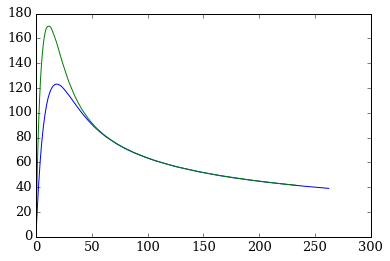

In [236]:
plot(vc_MW_r, IC_MW[:,3])
plot(r, IC_chervin[:,3])

In [224]:
r3 = np.linspace(0.1, 10, 100)
mass_MW_teo =  mass_hernquist(53.06, r2,  1.45E12)
mass_MW_NFW = mass_NFW(9.86, r2, 0, 0, 1E12)
dens_MW_NFW = dens_NFW(9.86, r3, 0, 0, 1E12) 
dens_MW_teo = dens_hernquist(53.06, r3,  1.45E12) 

#mass_MW_chervin =  mass_hernquist(40.15, r,  1.327E12)

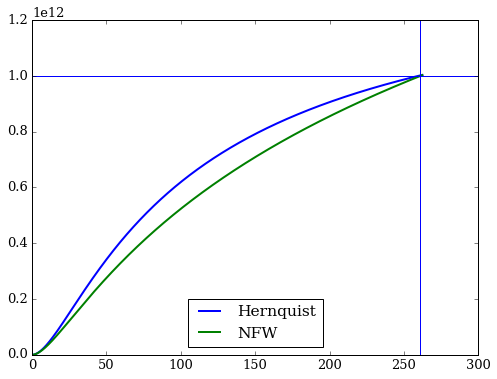

In [237]:
figure(figsize=(8, 6))
plot(r2, mass_MW_teo, label='Hernquist', lw=2)
plot(r2, mass_MW_NFW, label='NFW', lw=2)
#plot(r, mass_MW_chervin)
axvline(261)
axhline(1E12)
legend(loc='best')
rvir(1E12, 0)
savefig('../doc/MW_enclosedM.png', bbox_inches='tight')

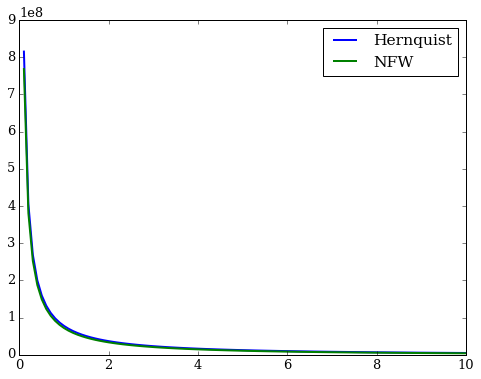

In [238]:
figure(figsize=(8, 6))
plot(r3, dens_MW_teo, label='Hernquist', lw=2)
plot(r3, dens_MW_NFW, label='NFW', lw=2)
#plot(r, mass_MW_chervin)
#axvline(261)
#axhline(1E12)
legend(loc='best')
#rvir(1E12, 0)
savefig('../doc/MW_enclosedRho.png', bbox_inches='tight')

In [8]:
x_MW = linspace(0, 261)

In [9]:
# Models
#-----------------------------------------
M_chervin_halo = 92.94E10 / h # from lsf.out of GalIC 200
A_chervin_halo = 28.1096 / h  # 200
print "chervin = ", M_chervin_halo, A_chervin_halo
#-----------------------------------------
M_analytic = 1.4669E12 
A_analytic = 53.07
print "Analytic =", M_analytic, A_analytic

chervin =  1.32771428571e+12 40.1565714286
Analytic = 1.4669e+12 53.07


In [10]:
vc_c_teo = vc_hernquist(A_chervin_halo, x, 0, 0, M_chervin_halo)

In [11]:
rho_Hernquist = dens_hernquist

In [12]:
plot(x,  vc_halo, label='Analytic', lw=2)
plot(x, vc_c_teo, label='chervin_analytic', lw=6)
plot(IC_chervin[:,0]/0.7, IC_chervin[:,2], label='Chervin', lw=2)
#plot(x, vc_N)
plot(IC_hack[:,0]/0.7, IC_hack[:,2], label='GalIC-hack', lw=2)
legend(loc='best')
savefig('halo_MW.png', bbox_inches='tight')

xlabel('$r(kpc)$', fontsize=20)
ylabel('$v_c(km/s)$', fontsize=20)
title('$M = 1E12M\odot,\ Rvir=261Kpc,\ r_s = 26.47$')
savefig('MW_rotcurves.png', bbox_inches='tight')

NameError: name 'vc_halo' is not defined

In [210]:
plot(x, M_hernquist)
plot(x, M_NFW)

NameError: name 'M_hernquist' is not defined

## LMC rotation curves this models were based on Gomez et al 15 

In [13]:
#data_n = loadtxt('../data/ICs/LMC/curve1_n.txt', skiprows=1)
data_n_LMC1 = loadtxt('../ICs/LMC/LMC1_rotcurve.txt' , skiprows=1)
data_n_LMC2 = loadtxt('../ICs/LMC/LMC2_rotcurve.txt' , skiprows=1)
data_n_LMC3 = loadtxt('../ICs/LMC/LMC3_rotcurve.txt' , skiprows=1)
data_n_LMC4 = loadtxt('../ICs/LMC/LMC4_rotcurve.txt' , skiprows=1)
data_n_LMC5 = loadtxt('../ICs/LMC/LMC5_rotcurve.txt' , skiprows=1)
data_n_LMC6 = loadtxt('../ICs/LMC/LMC6_rotcurve.txt' , skiprows=1)

In [34]:
MLMC = [3E10, 5E10, 8E10, 1E11, 1.8E11, 2.5E11]

x1 = linspace(0, 80, 100)
x2 = linspace(0, 100, 100)
x3 = linspace(0, 120, 100)
x4 = linspace(0, 125, 100)
x5 = linspace(0, 150, 100)
x6 = linspace(0, 170, 100)

vc_1 = vc_hernquist(8, x1, 0, 0, MLMC[0])
vc_2 = vc_hernquist(11, x2, 0, 0, MLMC[1])
vc_3 = vc_hernquist(14, x3, 0, 0, MLMC[2])
vc_4 = vc_hernquist(15, x4, 0, 0, MLMC[3])
vc_5 = vc_hernquist(20, x5, 0, 0, MLMC[4])
vc_6 = vc_hernquist(22.5, x6, 0, 0, MLMC[5])

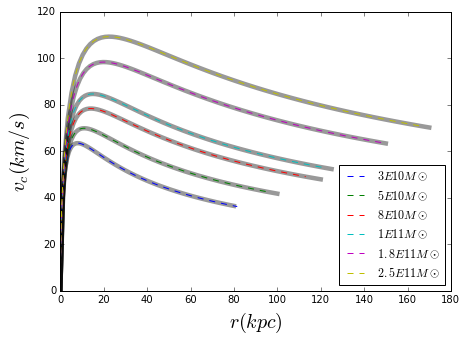

In [15]:
figure(figsize=(7, 5))

# ---------------- Theoretical -----------------------
plot(x1, vc_1, c='k', lw=4.5, alpha=0.4)
plot(x2, vc_2, c='k', lw=4.5, alpha=0.4)
plot(x3, vc_3, c='k', lw=4.5, alpha=0.4)
plot(x4, vc_4, c='k' ,lw=4.5, alpha=0.4)
plot(x5, vc_5, c='k', lw=4.5, alpha=0.4)
plot(x6, vc_6, c='k', lw=4.5, alpha=0.4)

# GalIC

plot(data_n_LMC1[:,0]/h, data_n_LMC1[:,1], lw=1,  ls='--', label='$3E10M\odot$')
plot(data_n_LMC2[:,0]/h, data_n_LMC2[:,1], lw=1,  ls='--', label='$5E10M\odot$')
plot(data_n_LMC3[:,0]/h, data_n_LMC3[:,1], lw=1,  ls='--', label='$8E10M\odot$')
plot(data_n_LMC4[:,0]/h, data_n_LMC4[:,1], lw=1,  ls='--', label='$1E11M\odot$')
plot(data_n_LMC5[:,0]/h, data_n_LMC5[:,1], lw=1,  ls='--', label='$1.8E11M\odot$')
plot(data_n_LMC6[:,0]/h, data_n_LMC6[:,1], lw=1,  ls='--', label='$2.5E11M\odot$')
legend(loc='best')

xlabel('$r(kpc)$', fontsize=20)
ylabel('$v_c(km/s)$', fontsize=20)
savefig('LMC_rotcurves.png', bbox_inches='tight')

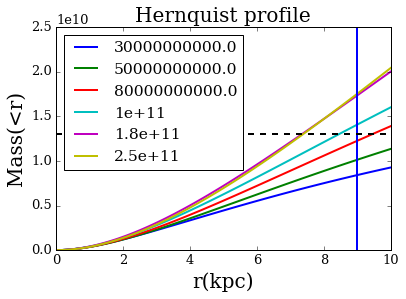

In [76]:
LMC_c = [8, 11, 14, 15, 20, 25]
x_LMC_inner = linspace(0, 10, 100)
x_LMC_outter = linspace(0, 50, 100)

Mass_LMC_in = zeros([6, 100])
Mass_LMC_out = zeros([6, 100])

for i in range(6):
    Mass_LMC_in[i,:] = mass_hernquist(LMC_c[i], x_LMC_inner, MLMC[i])
    Mass_LMC_out[i,:] = mass_hernquist(LMC_c[i], x_LMC_outter, MLMC[i])
    plot(x_LMC_inner, Mass_LMC_in[i, :], label=str(MLMC[i]), lw=2)

legend(loc='best')
axvline(9, lw=2)
axhline(1.3E10, lw=2, ls='--', c='k')
title('Hernquist profile', fontsize=20)
xlabel('r(kpc)', fontsize=20)
ylabel('Mass(<r)', fontsize=20)

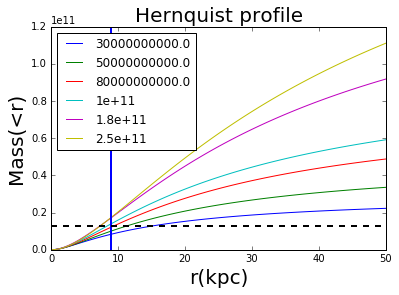

In [50]:
for i in range(6):
    plot(x_LMC_outter, Mass_LMC_out[i, :], label=str(MLMC[i]))
    
legend(loc='best')
axvline(9, lw=2)
axhline(1.3E10, lw=2, ls='--', c='k')
title('Hernquist profile', fontsize=20)
xlabel('r(kpc)', fontsize=20)
ylabel('Mass(<r)', fontsize=20)


## LMC: Plummer profile

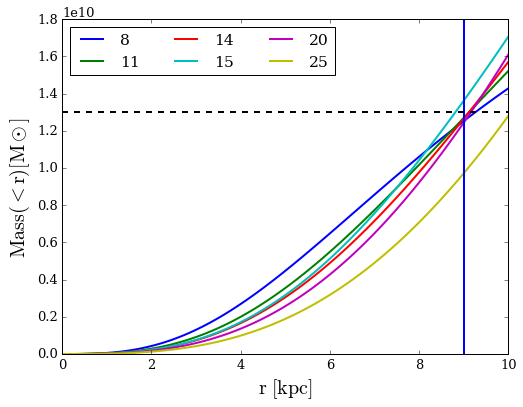

In [123]:
Mass_LMC_pin = zeros([6, 100])
Mass_LMC_pout = zeros([6, 100])

figure(figsize=(8, 6))
for i in range(6):
    Mass_LMC_pin[i,:] = mass_plummer(LMC_c[i], x_LMC_inner, MLMC[i])
    Mass_LMC_pout[i,:] = mass_plummer(LMC_c[i], x_LMC_outter, MLMC[i])
    plot(x_LMC_inner, Mass_LMC_pin[i, :], label=str(LMC_c[i]), lw=2)

axvline(9, lw=2)
axhline(1.3E10, lw=2, ls='--', c='k')
legend(loc='best', ncol=3)
xlabel('$\mathrm{r\ [kpc]}$', fontsize=20)
ylabel('$\mathrm{Mass(<r)[M\odot]}$', fontsize=20)
savefig('../doc/LMC_mass_plummer.png', bbox_inches='tight')

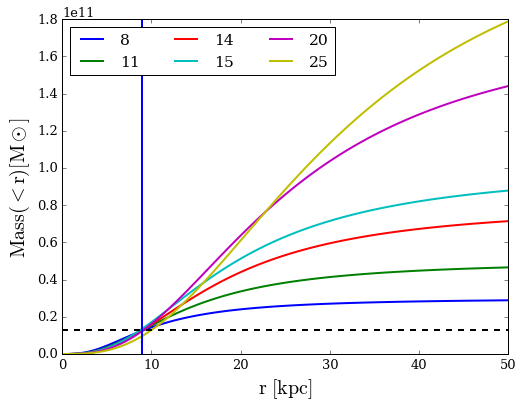

In [122]:
figure(figsize=(8, 6))
for i in range(6):
    plot(x_LMC_outter, Mass_LMC_pout[i, :], lw=2, label=str(LMC_c[i]))

axvline(9, lw=2)
axhline(1.3E10, lw=2, ls='--', c='k')
legend(loc='best', ncol=3)
xlabel('$\mathrm{r\ [kpc]}$', fontsize=20)
ylabel('$\mathrm{Mass(<r)[M\odot]}$', fontsize=20)
savefig('../doc/LMC_mass_plummer_out.png', bbox_inches='tight')

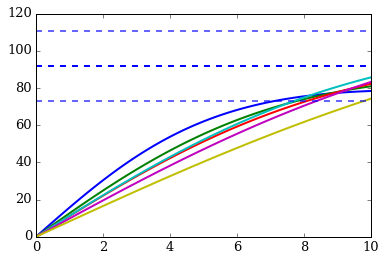

In [81]:
vc_LMC_pin = np.zeros([6, 100])
vc_LMC_pout = np.zeros([6, 100])

for i in range(6):
    vc_LMC_pin[i,:] = vc_plummer(LMC_c[i], x_LMC_inner, MLMC[i])
    vc_LMC_pout[i,:] = vc_plummer(LMC_c[i], x_LMC_outter, MLMC[i])
    plot(x_LMC_inner, vc_LMC_pin[i, :], label=str(MLMC[i]), lw=2)

vc_obs = 91.7 
    
axhline(vc_obs, lw=2, ls='--', alpha=1)
axhline(vc_obs+18.8, lw=2, ls='--', alpha=0.6)
axhline(vc_obs-18.8, lw=2, ls='--', alpha=0.6)

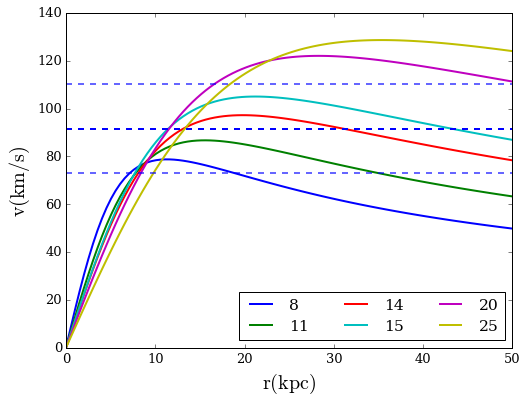

In [117]:
figure(figsize=(8, 6))
for i in range(6):
    plot(x_LMC_outter, vc_LMC_pout[i, :], label=str(LMC_c[i]), lw=2)
    
axhline(vc_obs, lw=2, ls='--', alpha=1)
axhline(vc_obs+18.8, lw=2, ls='--', alpha=0.6)
axhline(vc_obs-18.8, lw=2, ls='--', alpha=0.6)
xlabel('$\mathrm{r(kpc)}$', fontsize=20)
ylabel('$\mathrm{v(km/s)}$', fontsize=20)
legend(loc='best', ncol=3)
savefig('../doc/LMC_rotcurve_plummer.png', bbox_inches='tight')

# From cosmological simulations the concentration parameters for the previous Masses for the LMC let to the following rotation curves

### The concentration paramater for a NFW halo is:

In [20]:
def halo_c(M):# from http://adsabs.harvard.edu/abs/2011ApJ...740..102K eq.11
    h = 0.7
    C = 9.60 * (M * h/ 1E12)**(-0.075)
    return C

In [21]:
LMC_c_c1 = halo_c(3E10) # concentration paramter from cosmological simulations http://adsabs.harvard.edu/abs/2011ApJ...740..102K
LMC_c_c2 = halo_c(5E10)
LMC_c_c3 = halo_c(8E10)
LMC_c_c4 = halo_c(1E11)
LMC_c_c5 = halo_c(1.8E11)
LMC_c_c6 = halo_c(2.5E11)

print LMC_c_c1, LMC_c_c2, LMC_c_c3, LMC_c_c4, LMC_c_c5, LMC_c_c6

12.8264001882 12.3442903926 11.9167308634 11.718954823 11.2135582183 10.9406564127


In [22]:
## Finding a/rs ratio from Van Der MArel et al 2012 Apendix

In [23]:
def fx(x):
    f = np.log(1.+x) - (x / (1. + x))
    return f


def ars(c):
    x = 1 / ((2.0*fx(c))**(-0.5) - (1.0/c))
    return x

RvirLMC = np.zeros(6)
aLMC = np.zeros(6)
LMCc = np.zeros(6)
vcLMC_c = np.zeros([6, len(x)])
LMC_eM = np.zeros([6, len(x)])


for i in range(0, 6):
    LMCc[i] = halo_c(MLMC[i])
    RvirLMC[i] = rvir(MLMC[i], 0).value
    aLMC[i] = ars(LMCc[i])
    vcLMC_c[i, :] = vc_hernquist(aLMC[i], x,  0, 0, MLMC[i])
    LMC_eM[i, :] = mass_hernquist(aLMC[i], x, MLMC[i])



In [24]:
print "LMC conncentration paramter = ", LMCc
print "LMC Virial Radius", RvirLMC
print "LMC hernquist scale length", aLMC

LMC conncentration paramter =  [ 12.82640019  12.34429039  11.91673086  11.71895482  11.21355822
  10.94065641]
LMC Virial Radius [  81.17452307   96.2430392   112.56654152  121.25863099  147.50389748
  164.57328206]
LMC hernquist scale length [ 2.15268265  2.14215981  2.13253115  2.12797798  2.11604171  2.10940758]


### - Computing the circular velocity for a Hernquist profile

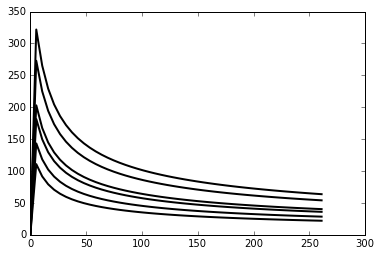

In [25]:
for i in range(0, 6):
    vcLMC_c[i, :] = vc_hernquist(aLMC[i], x,  0, 0, MLMC[i])
    plot(x, vcLMC_c[i, :], c='k', lw=2)


### - enclosed Mass

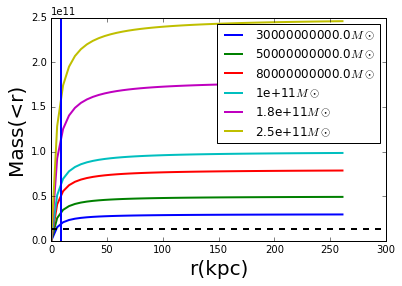

In [26]:
for i in range(0, 6):
    plot(x, LMC_eM[i, :], lw=2, label=str(MLMC[i])+"$M\odot$") 
legend(loc='best')
axvline(9, lw=2)
axhline(1.3E10, lw=2, ls='--', c='k')
xlabel('r(kpc)', fontsize=20)
ylabel('Mass(<r)', fontsize=20)

# Finding the Hernquist scale length:

In [59]:
a1 = !python LMC_hernquist_a.py 3E10
a2 = !python LMC_hernquist_a.py 5E10
a3 = !python LMC_hernquist_a.py 8E10
a4 = !python LMC_hernquist_a.py 1E11
a5 = !python LMC_hernquist_a.py 1.8E11
a6 = !python LMC_hernquist_a.py 2.5E11

In [60]:
print a1, a2, a3, a4, a5, a6

['4.91891891892'] ['8.97297297297'] ['13.7567567568'] ['16.4324324324'] ['25.1351351351'] ['30.0']


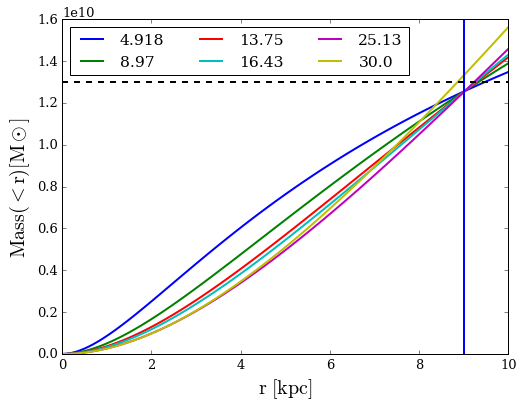

In [110]:
af_LMC = np.array([4.918, 8.97, 13.75, 16.43, 25.13, 30.0])
LMC_Mf_in = np.zeros([6, 100])
LMC_Mf_out = np.zeros([6, 100])
LMC_rhof_in = np.zeros([6, 100])
LMC_rhof_out = np.zeros([6, 100])
vcLMC_f = np.zeros([6, 100])

figure(figsize=(8, 6))


for i in range(6):
    LMC_Mf_in[i,:] = mass_hernquist(af_LMC[i], x_LMC_inner, MLMC[i])
    LMC_Mf_out[i,:] = mass_hernquist(af_LMC[i], x_LMC_outter, MLMC[i])
    LMC_rhof_in[i,:] = rho_Hernquist(af_LMC[i], x_LMC_inner, MLMC[i])
    LMC_rhof_out[i,:] = rho_Hernquist(af_LMC[i], x_LMC_outter, MLMC[i])
    plot(x_LMC_inner, LMC_Mf_in[i,:], lw=2, label=str(af_LMC[i]))
    
    
axvline(9, lw=2)
axhline(1.3E10, lw=2, ls='--', c='k')
legend(loc='best', ncol=3)
xlabel('$\mathrm{r\ [kpc]}$', fontsize=20)
ylabel('$\mathrm{Mass(<r)[M\odot]}$', fontsize=20)
savefig('../doc/LMC_mass_hernquist.png', bbox_inches='tight')

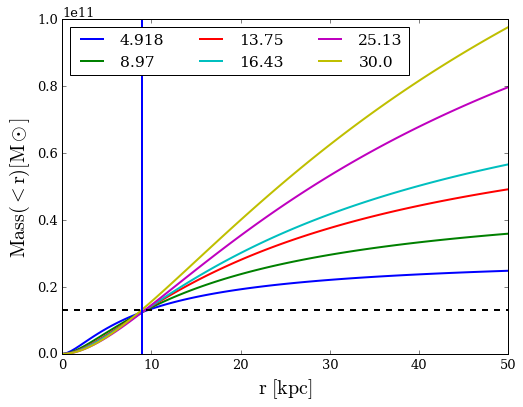

In [111]:
figure(figsize=(8, 6))
for i in range(6):
    plot(x_LMC_outter, LMC_Mf_out[i,:], lw=2, label=str(af_LMC[i]))

legend(loc='best', ncol=3)
axvline(9, lw=2)
axhline(1.3E10, lw=2, ls='--', c='k')
xlabel('$\mathrm{r\ [kpc]}$', fontsize=20)
ylabel('$\mathrm{Mass(<r)[M\odot]}$', fontsize=20)
savefig('../doc/LMC_mass_hernquist_out.png', bbox_inches='tight')

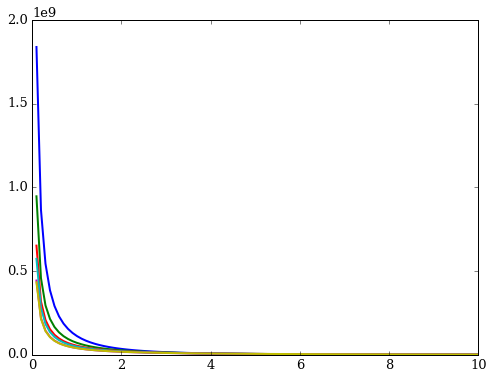

In [101]:
figure(figsize=(8, 6))
for i in range(6):
    plot(x_LMC_inner, LMC_rhof_in[i,:], lw=2, label=str(af_LMC[i]))


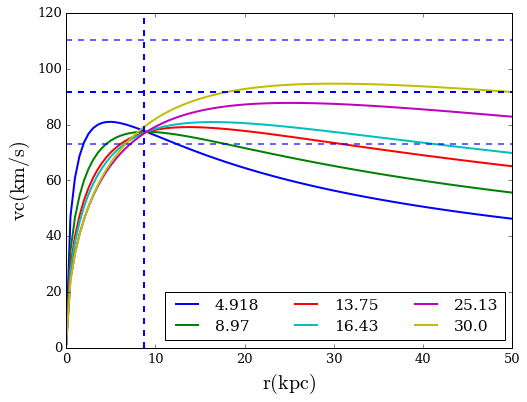

In [131]:
#x20 = np.linspace(0, 20, 100)
figure(figsize=(8, 6))
for i in range(6):
    vcLMC_f[i, :] = vc_hernquist(af_LMC[i], x_LMC_outter,  0, 0, MLMC[i])
    plot(x_LMC_outter, vcLMC_f[i,:], lw=2, label=str(af_LMC[i]))
xlabel('$\mathrm{r(kpc)}$', fontsize=20)
ylabel('$\mathrm{vc(km/s)}$', fontsize=20)
legend(loc='best', ncol=3)
axhline(vc_obs, lw=2, ls='--', alpha=1)
axhline(vc_obs+18.8, lw=2, ls='--', alpha=0.6)
axhline(vc_obs-18.8, lw=2, ls='--', alpha=0.6)
axvline(8.7, lw=2, ls='--')
savefig('../doc/LMC_rotcurve_hernquist.png', bbox_inches='tight')

In [125]:
a1 = !python LMC_hernquist_a.py 3E10 1.7E10
a2 = !python LMC_hernquist_a.py 5E10 1.7E10
a3 = !python LMC_hernquist_a.py 8E10 1.7E10
a4 = !python LMC_hernquist_a.py 1E11 1.7E10
a5 = !python LMC_hernquist_a.py 1.8E11 1.7E10
a6 = !python LMC_hernquist_a.py 2.5E11 1.7E10

print a1, a2, a3, a4, a5, a6

['3.13513513514'] ['6.64864864865'] ['10.8108108108'] ['13.1351351351'] ['20.7027027027'] ['26.027027027']


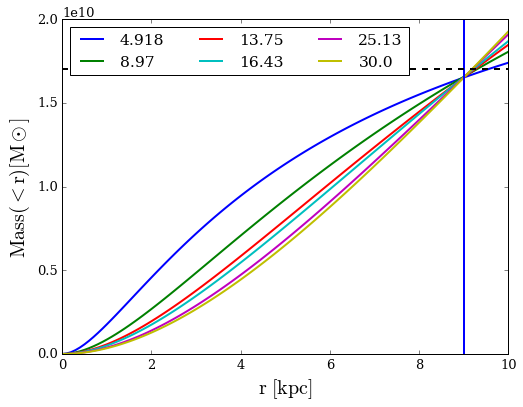

In [137]:
af_LMC_2 = np.array([3.13, 6.64, 10.81, 13.13, 20.70, 26.02])
LMC_Mf_in_2 = np.zeros([6, 100])
LMC_Mf_out_2 = np.zeros([6, 100])
LMC_rhof_in_2 = np.zeros([6, 100])
LMC_rhof_out_2 = np.zeros([6, 100])
vcLMC_f_2 = np.zeros([6, 100])
x_LMC_outter_2 = linspace(0, 100, 100)


figure(figsize=(8, 6))


for i in range(6):
    LMC_Mf_in_2[i,:] = mass_hernquist(af_LMC_2[i], x_LMC_inner, MLMC[i])
    LMC_Mf_out_2[i,:] = mass_hernquist(af_LMC_2[i], x_LMC_outter_2, MLMC[i])
    LMC_rhof_in_2[i,:] = rho_Hernquist(af_LMC_2[i], x_LMC_inner, MLMC[i])
    LMC_rhof_out_2[i,:] = rho_Hernquist(af_LMC_2[i], x_LMC_outter_2, MLMC[i])
    plot(x_LMC_inner, LMC_Mf_in_2[i,:], lw=2, label=str(af_LMC[i]))
    
    
axvline(9, lw=2)
axhline(1.7E10, lw=2, ls='--', c='k')
legend(loc='best', ncol=3)
xlabel('$\mathrm{r\ [kpc]}$', fontsize=20)
ylabel('$\mathrm{Mass(<r)[M\odot]}$', fontsize=20)
savefig('../doc/LMC_mass_hernquist_2.png', bbox_inches='tight')

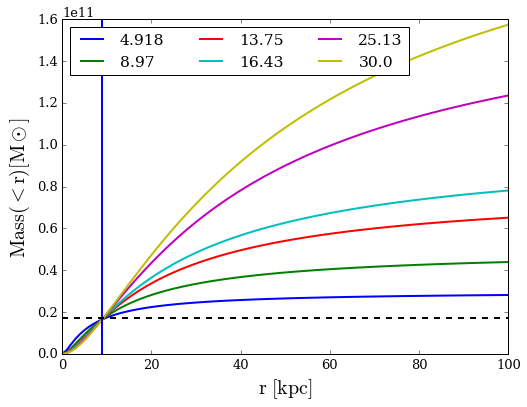

In [138]:
figure(figsize=(8, 6))
for i in range(6):
    plot(x_LMC_outter_2, LMC_Mf_out_2[i,:], lw=2, label=str(af_LMC[i]))

legend(loc='best', ncol=3)
axvline(9, lw=2)
axhline(1.7E10, lw=2, ls='--', c='k')
xlabel('$\mathrm{r\ [kpc]}$', fontsize=20)
ylabel('$\mathrm{Mass(<r)[M\odot]}$', fontsize=20)
savefig('../doc/LMC_mass_hernquist_out_2.png', bbox_inches='tight')

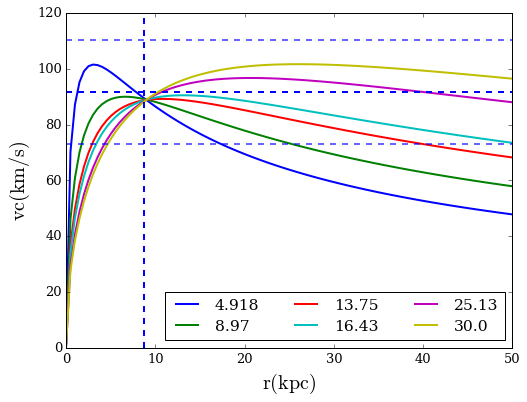

In [139]:
figure(figsize=(8, 6))
for i in range(6):
    vcLMC_f_2[i, :] = vc_hernquist(af_LMC_2[i], x_LMC_outter,  0, 0, MLMC[i])
    plot(x_LMC_outter, vcLMC_f_2[i,:], lw=2, label=str(af_LMC[i]))
xlabel('$\mathrm{r(kpc)}$', fontsize=20)
ylabel('$\mathrm{vc(km/s)}$', fontsize=20)
legend(loc='best', ncol=3)
axhline(vc_obs, lw=2, ls='--', alpha=1)
axhline(vc_obs+18.8, lw=2, ls='--', alpha=0.6)
axhline(vc_obs-18.8, lw=2, ls='--', alpha=0.6)
axvline(8.7, lw=2, ls='--')
savefig('../doc/LMC_rotcurve_hernquist_2.png', bbox_inches='tight')

# $M_{vir} \& R_{vir}$ relationships.. why is there a disagreement?

In [ ]:
h = 0.7
Delta_vir = 360
Omega_m = 0.27

def method1(Mvir):
    Rvir = 206 / h * units.kpc * (Delta_vir * Omega_m / 97.2)**(-1.0/3.0) * (Mvir * h / (1E12 * units.Msun) )**(1.0/3.0)
    return Rvir.to(units.kpc)

def method2(Mvir):
    Rvir = (2*G / (H*0.7)**2)**(1/3.0) * (Mvir / (Delta_vir * Omega_m))**(1/3.0)
    return Rvir.to(units.kpc)

In [89]:
Mvir = 1E12 * units.Msun

In [90]:
print 'method 1 ', method1(Mvir)
print 'method 2 ', method2(Mvir)

method 1  261.29746337 kpc
method 2  262.391566682 kpc


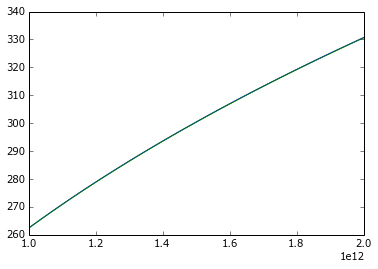

In [131]:
MM = linspace(1E12, 2E12, 100) * units.Msun
plot(MM, method1(MM)*1.0045)
plot(MM, method2(MM))

In [91]:
((G*Mvir*H * sqrt(48.6))**(1/3.0)).to(units.km/units.s)

<Quantity 144.2115290857826 km / s>

In [49]:
 H = 3.2407789E-18  / units.s 

In [82]:
((G*Mvir*H * sqrt(48.6))**(1/3.0)).to(units.km/units.s)

<Quantity 144.2115290857826 km / s>

In [57]:
V = 128.04 * units.km / units.s
Mvir_deduced  = V**3 / (sqrt(48.6) * G * H) 
Rvir_deduced = V / (6.97 * H *0.7)

In [58]:
print Mvir_deduced.to(units.Msun)
print Rvir_deduced.to(units.kpc)

6.9990170459e+11 solMass
262.430857527 kpc


In [59]:
102/0.7

145.71428571428572

In [169]:
(G/H**2).to(units.kpc**3 / units.Msun) * 2

<Quantity 0.001871769949953856 kpc3 / solMass>

In [182]:
206**3 * 97.2 / (1E12 * 0.7**2)

0.0017340908473469391